<a href="https://colab.research.google.com/github/pk2971/CO2-emissions-vs-GDP/blob/main/Predicting_the_CO2_emissions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [221]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost import plot_importance
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(algorithm='auto')
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor


In [222]:
df=pd.read_csv('/content/owid-co2-data.csv')

In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25191 entries, 0 to 25190
Data columns (total 60 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   iso_code                             21960 non-null  object 
 1   country                              25191 non-null  object 
 2   year                                 25191 non-null  int64  
 3   co2                                  23949 non-null  float64
 4   co2_per_capita                       23307 non-null  float64
 5   trade_co2                            3976 non-null   float64
 6   cement_co2                           12248 non-null  float64
 7   cement_co2_per_capita                12218 non-null  float64
 8   coal_co2                             17188 non-null  float64
 9   coal_co2_per_capita                  16860 non-null  float64
 10  flaring_co2                          4382 non-null   float64
 11  flaring_co2_per_capita      

**Data Exploration:-**

In [224]:
null_gdp=df['gdp'].isnull().sum()
gdp=df['gdp'].sum()
print("Null values in GDP",null_gdp)
print("Values in GDP",gdp)

Null values in GDP 11653
Values in GDP 3895001794715256.0


So there are very less number of null values in GDP. We will replace them with mean or median. Lets decide which one.

In [225]:
print("Mean of GDP",df['gdp'].mean())
print("Mean of GDP",df['gdp'].median())

Mean of GDP 287708804455.2551
Mean of GDP 30370194552.0


Mean might be effected by the GDP of very rich countries and is not an accurate value to replace the nulls with. As we can see there is a major difference between the mean and median of the GDP.

In [226]:
df['gdp']=df['gdp'].fillna(df['gdp'].median())

According to census the top 5 countries ranked according to GDP are:
1.USA
2.China
3.Japan
4.Germany
5.India
We will try concentrating on these countries for visualization first.

Dropping columns that have way too many null values.

In [227]:
df.drop(['iso_code','trade_co2','other_industry_co2','other_co2_per_capita','co2_per_unit_energy','consumption_co2','consumption_co2_per_capita','consumption_co2_per_gdp','cumulative_other_co2','trade_co2_share','share_global_other_co2'], axis=1, inplace=True)

In [228]:
df = df.dropna( axis=1, thresh=16000)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25191 entries, 0 to 25190
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   country                           25191 non-null  object 
 1   year                              25191 non-null  int64  
 2   co2                               23949 non-null  float64
 3   co2_per_capita                    23307 non-null  float64
 4   coal_co2                          17188 non-null  float64
 5   coal_co2_per_capita               16860 non-null  float64
 6   oil_co2                           20539 non-null  float64
 7   oil_co2_per_capita                20181 non-null  float64
 8   co2_growth_prct                   24931 non-null  float64
 9   co2_growth_abs                    23585 non-null  float64
 10  cumulative_co2                    23949 non-null  float64
 11  cumulative_coal_co2               17188 non-null  float64
 12  cumu

In [229]:
df['co2']=df['co2'].fillna(df['co2'].median())
df['co2_per_capita']=df['co2_per_capita'].fillna(df['co2_per_capita'].median())
df['coal_co2']=df['coal_co2'].fillna(df['coal_co2'].median())
df['co2']=df['co2'].fillna(df['co2'].median())
df['coal_co2_per_capita']=df['coal_co2_per_capita'].fillna(df['coal_co2_per_capita'].median())
df['oil_co2']=df['oil_co2'].fillna(df['oil_co2'].median())
df['oil_co2_per_capita']=df['oil_co2_per_capita'].fillna(df['oil_co2_per_capita'].median())
df['co2_growth_prct']=df['co2_growth_prct'].fillna(df['co2_growth_prct'].median())
df['co2_growth_abs']=df['co2_growth_abs'].fillna(df['co2_growth_abs'].median())
df['cumulative_co2']=df['cumulative_co2'].fillna(df['cumulative_co2'].median())
df['cumulative_coal_co2']=df['cumulative_coal_co2'].fillna(df['cumulative_coal_co2'].median())
df['cumulative_oil_co2']=df['cumulative_oil_co2'].fillna(df['cumulative_oil_co2'].median())
df['share_global_co2']=df['share_global_co2'].fillna(df['share_global_co2'].median())
df['share_global_oil_co2']=df['share_global_oil_co2'].fillna(df['share_global_oil_co2'].median())
df['share_global_cumulative_co2']=df['share_global_cumulative_co2'].fillna(df['share_global_cumulative_co2'].median())
df['share_global_cumulative_coal_co2']=df['share_global_cumulative_coal_co2'].fillna(df['share_global_cumulative_coal_co2'].median())
df['share_global_cumulative_oil_co2']=df['share_global_cumulative_oil_co2'].fillna(df['share_global_cumulative_oil_co2'].median())
df['population']=df['population'].fillna(df['population'].median())
df['share_global_coal_co2']=df['share_global_coal_co2'].fillna(df['share_global_coal_co2'].median())


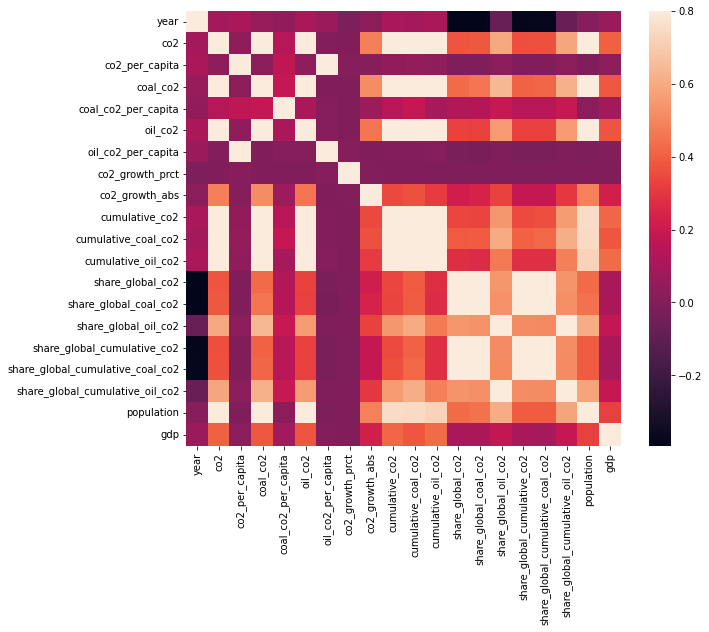

In [230]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corrmat, vmax=.8, square=True,xticklabels=True, yticklabels=True);

In [231]:
df.drop(['cumulative_co2','cumulative_coal_co2','cumulative_oil_co2','share_global_co2','share_global_coal_co2','share_global_oil_co2','share_global_cumulative_co2','share_global_cumulative_coal_co2','share_global_cumulative_oil_co2','co2_per_capita','coal_co2_per_capita','oil_co2_per_capita'], axis=1, inplace=True)

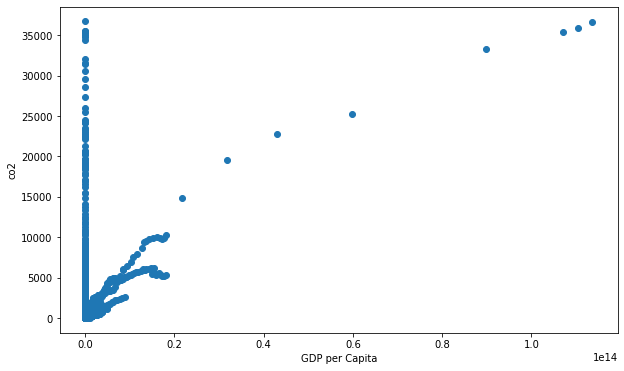

In [232]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = df['gdp'], y = df['co2'])
plt.xlabel("GDP per Capita")
plt.ylabel("co2")

plt.show()

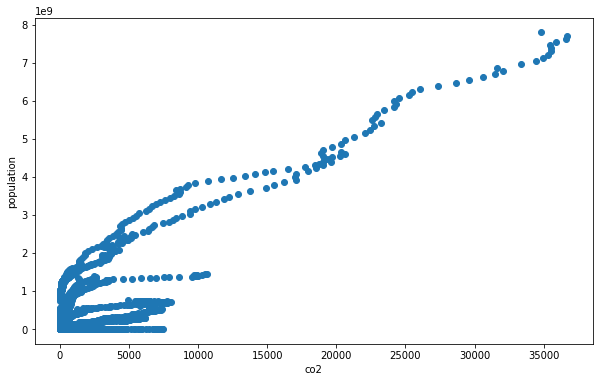

In [233]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = df['co2'], y = df['population'])
plt.xlabel("co2")
plt.ylabel("population")

plt.show()

In [234]:
df=df.drop('country',1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [235]:
df=df.drop('year',1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [236]:
!pip install sklearn

In [237]:
X = df.drop('co2', axis=1)
y = df.co2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123) 

In [238]:
rf = RandomForestRegressor(n_estimators=200)
rf.fit(X_train,y_train)
predict_rf = rf.predict(X_test)

In [239]:
import math
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
print("\nMAE:", round(mean_absolute_error(predict_rf,y_test)))
print("\nMSE:", round(mean_squared_error(y_test,predict_rf),4))
print("\nRMSE:", round(math.sqrt(mean_squared_error(y_test, predict_rf)),4))
print("\nR^2:", round(r2_score(y_test,predict_rf),4))


MAE: 10

MSE: 4236.8141

RMSE: 65.0908

R^2: 0.9984


In [240]:
xgbr = xgb.XGBRegressor (nobjective='regression',n_estimators=1000,learning_rate=0.05)
xgbr.fit(X_train, y_train)
predict_xgbr = xgbr.predict(X_test)

[01:01:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [241]:
print("\nMAE:", round(mean_absolute_error(predict_xgbr,y_test)))
print("\nMSE:", round(mean_squared_error(y_test,predict_xgbr),4))
print("\nRMSE:", round(math.sqrt(mean_squared_error(y_test, predict_xgbr)),4))
print("\nR^2:", round(r2_score(y_test,predict_xgbr),4))



MAE: 15

MSE: 6699.7797

RMSE: 81.8522

R^2: 0.9974


In [242]:
lr = LinearRegression()
lr.fit(X_train,y_train)
predict_lr = lr.predict(X_test)


In [243]:
print("\nMAE:", round(mean_absolute_error(predict_lr,y_test)))
print("\nMSE:", round(mean_squared_error(y_test,predict_lr),4))
print("\nRMSE:", round(math.sqrt(mean_squared_error(y_test, predict_lr)),4))
print("\nR^2:", round(r2_score(y_test,predict_lr),4))


MAE: 26

MSE: 11174.9567

RMSE: 105.7117

R^2: 0.9957


In [244]:
gb = GradientBoostingRegressor(n_estimators=1000,learning_rate=0.05)
gb.fit(X_train,y_train)
predict_gb = gb.predict(X_test)

In [245]:
print("\nMAE:", round(mean_absolute_error(predict_gb,y_test)))
print("\nMSE:", round(mean_squared_error(y_test,predict_gb),4))
print("\nRMSE:", round(math.sqrt(mean_squared_error(y_test, predict_gb)),4))
print("\nR^2:", round(r2_score(y_test,predict_gb),4))


MAE: 15

MSE: 6689.6785

RMSE: 81.7905

R^2: 0.9975


In [246]:
knn.fit(X_train,y_train)
predict_knn = knn.predict(X_test)

In [247]:
print("\nMAE:", round(mean_absolute_error(predict_knn,y_test)))
print("\nMSE:", round(mean_squared_error(y_test,predict_knn),4))
print("\nRMSE:", round(math.sqrt(mean_squared_error(y_test, predict_knn)),4))
print("\nR^2:", round(r2_score(y_test,predict_knn),4))


MAE: 90

MSE: 183172.5782

RMSE: 427.9867

R^2: 0.9303
